# Player Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning and Data Exploration

In [2]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [3]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 22)

In [5]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,2,0,0,2,2,NaN,NaN


### Taking in consideration only MI VS KXIP matches

In [6]:
KXIP_MI =matches[np.logical_or(np.logical_and(matches['team1']=='Kings XI Punjab',matches['team2']=='Mumbai Indians'),
                            np.logical_and(matches['team2']=='Kings XI Punjab',matches['team1']=='Mumbai Indians'))]

KXIP_MI.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
5055,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,HM Amla,SE Marsh,HH Pandya,0,0,1,0,1,NaN,NaN
5056,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,NaN,NaN
5057,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,4,0,4,NaN,NaN
5058,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,NaN,NaN
5059,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,1,0,1,NaN,NaN


In [7]:
KXIP_MI.match_id.nunique()

24

### Analysis of wickets KXIP is expected to loose in Powerplay overs

In [8]:
powerplay = KXIP_MI[KXIP_MI["over"]<=6]

powerplay.over.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [9]:
powerplay.match_id.nunique()

24

In [10]:
powerplay.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
5055,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,HM Amla,SE Marsh,HH Pandya,0,0,1,0,1,NaN,NaN
5056,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,NaN,NaN
5057,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,4,0,4,NaN,NaN
5058,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,NaN,NaN
5059,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,1,0,1,NaN,NaN


In [11]:
KXIP_powerplay = powerplay[powerplay["batting_team"]=="Kings XI Punjab"]

KXIP_powerplay.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
5055,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,HM Amla,SE Marsh,HH Pandya,0,0,1,0,1,NaN,NaN
5056,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,NaN,NaN
5057,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,4,0,4,NaN,NaN
5058,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,NaN,NaN
5059,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,1,0,1,NaN,NaN


In [12]:
KXIP_powerplay.match_id.nunique()

24

In [13]:
overall_wicket_fall = pd.DataFrame(KXIP_powerplay.groupby(["season","match_id"])["player_dismissed"].count())
overall_wicket_fall.columns = ["wicket fall"]

In [14]:
overall_wicket_fall

wicket fall
season match_id             
2008   69                  1
       106                 1
2009   135                 2
       157                 3
2010   201                 2
       215                 1
2011   273                 1
       287                 1
2012   336                 0
       340                 1
2013   421                 2
       450                 2
2014   479                 2
       505                 1
2015   524                 0
       552                 2
2016   597                 2
       619                 1
2017   22                  1
       50                  1
2018   7927                0
       7943                1
2019   11145               0
       11315               0

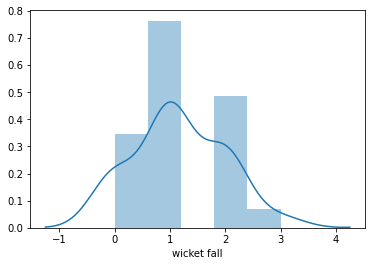

In [15]:
sns.distplot(overall_wicket_fall["wicket fall"])

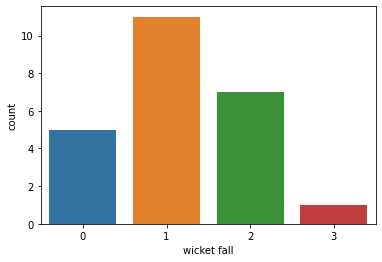

In [16]:
sns.countplot(overall_wicket_fall["wicket fall"])

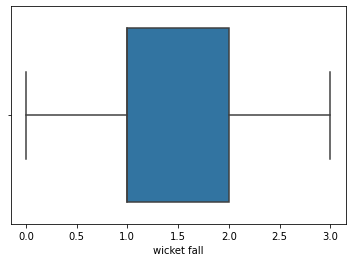

In [17]:
sns.boxplot(overall_wicket_fall["wicket fall"])

In [18]:
overall_wicket_fall.shape

(24, 1)

In [19]:
print("Average no of wickets lost by KXIP in first 6 overs against MI :",round(overall_wicket_fall["wicket fall"].mean()))

Average no of wickets lost by KXIP in first 6 overs against MI : 1


### Inning wise


- Ist Inning

In [20]:
first_inning = KXIP_powerplay[KXIP_powerplay["inning"]==1]

In [21]:
first_inning.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
5055,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,HM Amla,SE Marsh,HH Pandya,0,0,1,0,1,NaN,NaN
5056,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,NaN,NaN
5057,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,4,0,4,NaN,NaN
5058,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,0,0,0,NaN,NaN
5059,22,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kings XI Punjab,Mumbai Indians,...,SE Marsh,HM Amla,HH Pandya,0,0,1,0,1,NaN,NaN


In [22]:
first_inning.inning.unique()

array([1], dtype=int64)

In [23]:
first_inning.match_id.nunique()

15

In [24]:
overall_1st_inning = pd.DataFrame(first_inning.groupby(["season","match_id"])["player_dismissed"].count())
overall_1st_inning.columns = ["wicket_fall"]
overall_1st_inning

wicket_fall
season match_id             
2008   69                  1
       106                 1
2009   135                 2
       157                 3
2010   201                 2
2011   287                 1
2012   340                 1
2013   450                 2
2014   479                 2
       505                 1
2015   524                 0
2017   22                  1
       50                  1
2018   7927                0
2019   11315               0

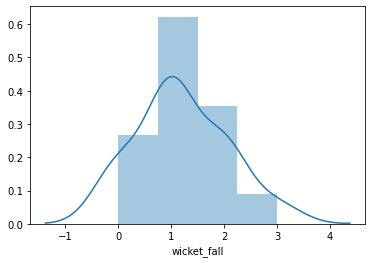

In [25]:
sns.distplot(overall_1st_inning["wicket_fall"])

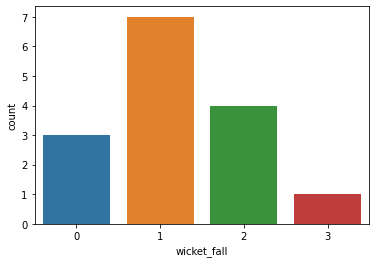

In [26]:
sns.countplot(overall_1st_inning["wicket_fall"])

In [27]:
print("Average no of wickets lost by KXIP in first 6 overs against MI while bating first :",round(overall_1st_inning["wicket_fall"].mean()))

Average no of wickets lost by KXIP in first 6 overs against MI while bating first : 1


- 2nd Inning

In [28]:
second_inning = KXIP_powerplay[KXIP_powerplay["inning"]==2]

In [29]:
second_inning.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
50817,215,2010,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,2,Kings XI Punjab,Mumbai Indians,...,AB Barath,DPMD Jayawardene,R McLaren,0,0,0,0,0,NaN,NaN
50818,215,2010,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,2,Kings XI Punjab,Mumbai Indians,...,AB Barath,DPMD Jayawardene,R McLaren,0,0,0,0,0,NaN,NaN
50819,215,2010,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,2,Kings XI Punjab,Mumbai Indians,...,AB Barath,DPMD Jayawardene,R McLaren,0,0,1,0,1,NaN,NaN
50820,215,2010,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,2,Kings XI Punjab,Mumbai Indians,...,DPMD Jayawardene,AB Barath,R McLaren,0,0,0,0,0,NaN,NaN
50821,215,2010,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,2,Kings XI Punjab,Mumbai Indians,...,DPMD Jayawardene,AB Barath,R McLaren,0,0,4,0,4,NaN,NaN


In [30]:
second_inning.inning.unique()

array([2], dtype=int64)

In [31]:
second_inning.match_id.nunique()

9

In [32]:
overall_2nd_inning = pd.DataFrame(second_inning.groupby(["season","match_id",])["player_dismissed"].count())
overall_2nd_inning.columns = ["wicket_fall"]

overall_2nd_inning

wicket_fall
season match_id             
2010   215                 1
2011   273                 1
2012   336                 0
2013   421                 2
2015   552                 2
2016   597                 2
       619                 1
2018   7943                1
2019   11145               0

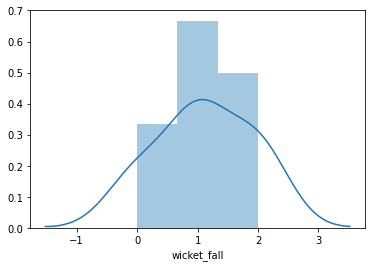

In [33]:
sns.distplot(overall_2nd_inning["wicket_fall"])

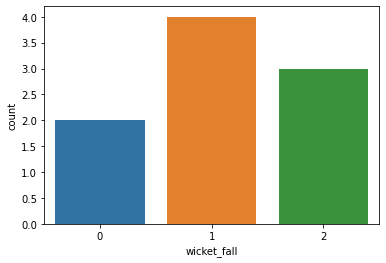

In [34]:
sns.countplot(overall_2nd_inning["wicket_fall"])

In [35]:
print("Average no of wickets lost by KXIP in first 6 overs against MI while bating second :",round(overall_2nd_inning["wicket_fall"].mean()))

Average no of wickets lost by KXIP in first 6 overs against MI while bating second : 1


### Confidence Interval Calculation

In [36]:
overall_wicket_fall.describe().T

,count,mean,std,min,25%,50%,75%,max
wicket fall,24.0,1.166667,0.816497,0.0,1.0,1.0,2.0,3.0


In [37]:
mean = overall_wicket_fall["wicket fall"].mean()
sd = overall_wicket_fall["wicket fall"].std()
n = len(overall_wicket_fall)

n

24

In [38]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.16666666666666669

In [39]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("So , our 95% Confidence Interval for wickets that KXIP can loose in first 6 overs against MI :{}".format((lcb, ucb)))

So , our 95% Confidence Interval for wickets that KXIP can loose in first 6 overs against MI :(1.0, 2.0)


### Analysis of total wickets that can fall in MI VS KXIP match

In [40]:
Each_team_wicket_fall = pd.DataFrame(KXIP_MI.groupby("bowling_team").player_dismissed.count())

Each_team_wicket_fall.columns=["Total wicket fall"]

print("Wicket fall down for each team (overall) :")
Each_team_wicket_fall

Wicket fall down for each team (overall) :


,Total wicket fall
bowling_team,
Kings XI Punjab,149
Mumbai Indians,145


In [41]:
wickets_fall_down_by_match = pd.DataFrame(KXIP_MI.groupby(['season',"match_id"]).agg({'player_dismissed' : 'count'}))

wickets_fall_down_by_match.columns = ["wickets fall"]


wickets_fall_down_by_match

wickets fall
season match_id              
2008   69                  19
       106                 14
2009   135                 15
       157                 11
2010   201                 16
       215                 13
2011   273                 13
       287                 18
2012   336                 10
       340                  9
2013   421                 13
       450                 17
2014   479                 10
       505                 11
2015   524                 12
       552                 10
2016   597                 13
       619                 12
2017   22                   6
       50                   9
2018   7927                10
       7943                13
2019   11145                9
       11315               11

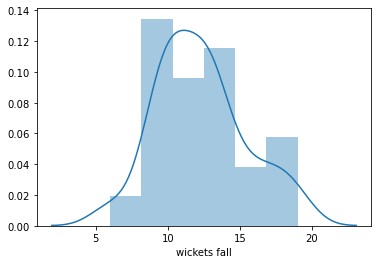

In [42]:
sns.distplot(wickets_fall_down_by_match["wickets fall"])

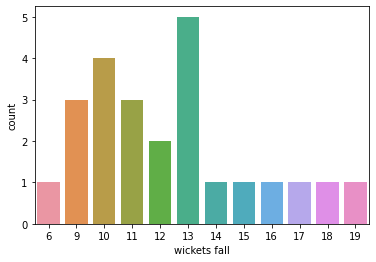

In [43]:
sns.countplot(wickets_fall_down_by_match["wickets fall"])

In [44]:
print("Average no of wickets(total) that can fall down in KXIP VS MI matches :",round(wickets_fall_down_by_match["wickets fall"].mean()))

Average no of wickets(total) that can fall down in KXIP VS MI matches : 12


### Confidence Interval Calculation

In [45]:
wickets_fall_down_by_match.describe().T

,count,mean,std,min,25%,50%,75%,max
wickets fall,24.0,12.25,3.124239,6.0,10.0,12.0,13.25,19.0


In [46]:
mean = wickets_fall_down_by_match["wickets fall"].mean()
sd = wickets_fall_down_by_match["wickets fall"].std()
n = len(wickets_fall_down_by_match)

n

24

In [47]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.6377326230880185

In [48]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("So , our 95% Confidence Interval for wickets that can be fall down in KXIP VS MI match :{}".format((lcb, ucb)))

So , our 95% Confidence Interval for wickets that can be fall down in KXIP VS MI match :(11.0, 14.0)


## KL Rahul dismissal Analysis

- Against only MI while playing with KXIP

In [49]:
rahul = KXIP_MI[KXIP_MI["batsman"]=="KL Rahul"]


batsmen_score = pd.DataFrame(rahul.groupby(['season',"match_id","batsman"]).agg({'batsman_runs' : 'sum', 'ball' :'count'}))
batsmen_score

batsman_runs  ball
season match_id batsman                     
2018   7927     KL Rahul            24    20
       7943     KL Rahul            99    64
2019   11145    KL Rahul            72    58
       11315    KL Rahul           104    66

In [50]:
rahul_against_MI = rahul[rahul["player_dismissed"]=="KL Rahul"]
dismissal= pd.DataFrame(rahul_against_MI.groupby("bowler")["player_dismissed"].count())


dismissal

,player_dismissed
bowler,
JJ Bumrah,1
M Markande,1


In [51]:
batsmen_score = pd.DataFrame(rahul.groupby(['season',"match_id","inning","batsman"]).agg({'batsman_runs' : 'sum', 'ball' :'count' , "player_dismissed":"count" }))
batsmen_score

batsman_runs  ball  player_dismissed
season match_id inning batsman                                       
2018   7927     1      KL Rahul            24    20                 1
       7943     2      KL Rahul            99    64                 1
2019   11145    2      KL Rahul            72    58                 0
       11315    1      KL Rahul           104    66                 0

In [52]:
rahul_diss_kind = rahul_against_MI.groupby(["dismissal_kind"])["dismissal_kind"].count()
dismissal_kind = pd.DataFrame(rahul_diss_kind)

dismissal_kind

,dismissal_kind
dismissal_kind,
caught,2


In [53]:
rahul_diss_k = rahul_against_MI.groupby(["bowler","inning","dismissal_kind"])["dismissal_kind"].count()
dismissal_kind_inning_wise = pd.DataFrame(rahul_diss_k)

print("Inning wise Dismissal :")
dismissal_kind_inning_wise

Inning wise Dismissal :


,,,dismissal_kind
bowler,inning,dismissal_kind,
JJ Bumrah,2,caught,1
M Markande,1,caught,1


- Overall dismissal type

In [93]:
rahul_overall = matches[matches["batsman"]=="KL Rahul"]
rahul_dismiss12 = rahul_overall[rahul_overall["player_dismissed"]=="KL Rahul"]

In [105]:
dismiss_count = pd.DataFrame(rahul_dismiss12.groupby(["match_id"])["player_dismissed"].count())

total_times = dismiss_count.sum()
counter = rahul_overall.match_id.nunique()

out_percentage = total_times/counter

print("Percentage of KL Rahul getting out :{}%".format(int(round(out_percentage[0]*100))))

Percentage of KL Rahul getting out :81%


In [107]:
rahul_dismiss = rahul_overall[rahul_overall["player_dismissed"]=="KL Rahul"]

In [108]:
dismissal = pd.DataFrame(rahul_dismiss.groupby(["bowler","dismissal_kind"])["player_dismissed"].count())

dismissal.columns = ["dismissal count"]

print("KL Rahul dismissal :")
dismissal

KL Rahul dismissal :


,,dismissal count
bowler,dismissal_kind,
A Nehra,caught,1
A Zampa,caught,1
AB Dinda,caught,1
AD Mathews,bowled,1
AR Patel,caught,1
Azhar Mahmood,caught,1
BCJ Cutting,bowled,1
CH Morris,lbw,1
CR Brathwaite,bowled,1


In [109]:
dismissal_kind_overall = pd.DataFrame(rahul_dismiss.groupby(["dismissal_kind"])["dismissal_kind"].count())


dismissal_kind_overall

,dismissal_kind
dismissal_kind,
bowled,10
caught,30
lbw,4
run out,1
stumped,2


From all the above analysis of KL Rahul (against MI and overall also) we can see that majority of times he got out is by getting caught.

So we can predict that he has better chances of getting OUT by caught out.

### Type of bowler Q de Kock can get out to 

- Against current KXIP bowlers

In [110]:
qdk = KXIP_MI[KXIP_MI["batsman"]=="Q de Kock"]
qdk_dismiss = qdk[qdk["player_dismissed"]=="Q de Kock"]

qdk_dismiss

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
166772,11145,2019,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,1,Mumbai Indians,Kings XI Punjab,...,Q de Kock,Yuvraj Singh,Mohammed Shami,0,0,0,0,0,Q de Kock,lbw
170509,11315,2019,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,2,Mumbai Indians,Kings XI Punjab,...,Q de Kock,KA Pollard,R Ashwin,0,0,0,0,0,Q de Kock,caught


In [111]:
dismissal_q = pd.DataFrame(qdk_dismiss.groupby(["bowler","dismissal_kind"])["player_dismissed"].count())

dismissal_q.columns = ["dismissal count"]

print("QDK dismissal :")
dismissal_q

QDK dismissal :


,,dismissal count
bowler,dismissal_kind,
Mohammed Shami,lbw,1
R Ashwin,caught,1


From matches played against KXIP we don't get a clear picture of Q DE KOCK's dismissal to which type of bowler so , we need to analyse his overall dismissal type to get a better insight about his dismissal.

- Overall 

In [112]:
qdk_overall = matches[matches["batsman"]=="Q de Kock"]

qdk_dismissal_overall = qdk_overall[qdk_overall["player_dismissed"]=="Q de Kock"]

qdk_dismissal_overall.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
95097,402,2013,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Pune Warriors,...,Q de Kock,PA Patel,AB Dinda,0,0,0,0,0,Q de Kock,caught
95924,405,2013,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,Sunrisers Hyderabad,2,Sunrisers Hyderabad,Kings XI Punjab,...,Q de Kock,PA Reddy,P Kumar,0,0,0,0,0,Q de Kock,bowled
97962,414,2013,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,Chennai Super Kings,1,Sunrisers Hyderabad,Chennai Super Kings,...,Q de Kock,S Dhawan,MM Sharma,0,0,0,0,0,Q de Kock,caught
111245,469,2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,2,Delhi Daredevils,Sunrisers Hyderabad,...,Q de Kock,M Vijay,KV Sharma,0,0,0,0,0,Q de Kock,caught
112109,473,2014,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,Delhi Daredevils,2,Delhi Daredevils,Mumbai Indians,...,Q de Kock,M Vijay,CJ Anderson,0,0,0,0,0,Q de Kock,caught


In [113]:
qdk_dismissal_overall.match_id.nunique()

45

In [114]:
dismissal = pd.DataFrame(qdk_dismissal_overall.groupby(["bowler"])["player_dismissed"].count())

dismissal.columns = ["dismissal count of Quinton"]

dismissal.reset_index(level=0, inplace=True)

print("Quinton De Kock dismissal :")
dismissal

Quinton De Kock dismissal :


,bowler,dismissal count of Quinton
0,AB Dinda,2
1,AD Russell,2
2,BB Sran,1
3,CJ Anderson,1
4,D Short,1
5,DJ Bravo,1
6,DL Chahar,2
7,DS Kulkarni,1
8,DW Steyn,1
9,Harbhajan Singh,1


In [115]:
dismissal.nunique()[0]

36

In [116]:
seam = ["AB Dinda","AD Russell","BB Sran",'CJ Anderson',"DJ Bravo","DL Chahar","DS Kulkarni","DW Steyn","I Sharma",
                       "IC Pandey","J Archer","MA Starc","MC Henriques","MJ McClenaghan","MM Sharma","MP Stoinis","Mohammed Shami",
                      "P Krishna","P Kumar","S Kaul","SN Thakur","SR Watson","UT Yadav",""]
spin = ["D Short","Harbhajan Singh","KH Pandya","KV Sharma","Kuldeep Yadav","M Ali","PP Chawla","PV Tambe","R Ashwin",
                       "S Gopal","S Kaushik","SP Narine","YS Chahal"]

In [117]:
def classify(df) :
    if df["bowler"] in seam:
        return "seam"
    if df["bowler"] in spin:
        return "spin" 

In [118]:
dismissal["type"] = dismissal.apply(classify , axis = 1)

dismissal

,bowler,dismissal count of Quinton,type
0,AB Dinda,2,seam
1,AD Russell,2,seam
2,BB Sran,1,seam
3,CJ Anderson,1,seam
4,D Short,1,spin
5,DJ Bravo,1,seam
6,DL Chahar,2,seam
7,DS Kulkarni,1,seam
8,DW Steyn,1,seam
9,Harbhajan Singh,1,spin


Dismissal Count (excluding multiple wicket by same bowler) :


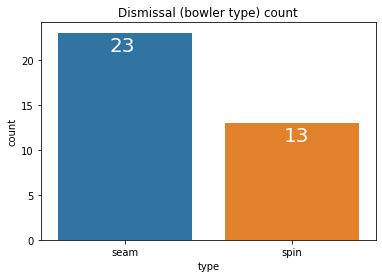

In [132]:
sns.countplot(dismissal["type"])
plt.text(-0.09,21,str(dismissal['type'].value_counts()['seam']),size=20,color='white')
plt.text(0.95,11,str(dismissal['type'].value_counts()['spin']),size=20,color='white')
plt.title("Dismissal (bowler type) count")

print("Dismissal Count (excluding multiple wicket by same bowler) :")

In [133]:
print(" Total Wickets taken by bowlers(seam or spinner) of Q DE KOCK : ")

total = pd.DataFrame(dismissal.groupby("type")["dismissal count of Quinton"].sum())

total

 Total Wickets taken by bowlers(seam or spinner) of Q DE KOCK : 


,dismissal count of Quinton
type,
seam,28
spin,17


In [134]:
Out_Percentage = total["dismissal count of Quinton"]/sum(total["dismissal count of Quinton"])

Out_Percentage

type
seam    0.622222
spin    0.377778
Name: dismissal count of Quinton, dtype: float64

In [135]:
print(" QDK getting out to a pacer percentage : {}%".format(int(round(Out_Percentage[0]*100))))
print(" QDK getting out to a spinner percentage : {}%".format(int(round(Out_Percentage[1]*100))))

 QDK getting out to a pacer percentage : 62%
 QDK getting out to a spinner percentage : 38%


From all the above analysis of dismissal by which type of bowler , we can observe that Q DE KOCK has been trapped majority of times by seam bowlers(62%) as campared to spin bowlers(38%).

So we can predict his dismissal in this match also has a better chance to be done by seam bowlers.